## Useful functions

In [1]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt
from LinearBanditTS import *
import matplotlib.pyplot as plt

In [2]:
def plot_regret(regrets):
    plt.plot(regrets)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Regret')
    plt.title('Cumulative Regret as a Function of Time')
    plt.show()

# Week 4

## Goals and Objectives

### Make Thompson sampling algoirthm for linear bandits

In [3]:
def thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise):

    # Initialize the linear bandit with Thompson Sampling
    bandit = LinearBanditTS(d, sigma_prior=1.0, sigma_noise=sigma_noise)

    # Initialize variables to keep track of the regrets and the number of times the best item is chosen
    regrets = np.zeros(num_rounds, dtype=float)
    differences = np.zeros(num_rounds, dtype=float)
    best_items = np.zeros(num_rounds, dtype=float)
    cumulative_regret = 0

    # Find the item with the highest dot product with the true theta
    best_item = np.argmax(item_features @ true_theta)

    # print("Best item index: ", best_item)
    # print("Best item features: ", item_features[best_item])
    # print("Dot products: ", item_features @ true_theta)
    #print("-------")

    for t in range(num_rounds):

        # Sample a theta from the current multivariate Gaussian distribution
        sampled_theta = bandit.sample_theta()

        # Choose the item with the highest dot product with the sampled theta
        chosen_item = np.argmax(item_features @ sampled_theta)

        # Compute the reward as true_theta @ item_features[chosen_item]
        mean_reward = true_theta @ item_features[chosen_item]
        reward = mean_reward + np.random.normal(0, sigma_noise)
        # TODO: pass reward to bandit.update, remove noise from bandit.update
        bandit.update(item_features[chosen_item], mean_reward)

        # Update the regrets
        cumulative_regret += true_theta @ item_features[best_item] - mean_reward
        regrets[t] = cumulative_regret
        differences[t] = np.linalg.norm(true_theta - bandit.mu)
        # Check if the best item was chosen
        best_items[t] = 1.0 if chosen_item == best_item else 0.0

    # print("Final theta: ", sampled_theta)
    #print("Final estimate: ", bandit.mu)
    return regrets, best_items, differences

In [4]:
def run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs):
    regrets = np.zeros(num_rounds, dtype=float)
    differences = np.zeros(num_rounds, dtype=float)

    for run in range(nbr_runs):
        regret, _, difference = thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise)
        regrets += regret
        differences += difference

    average_regrets = np.divide(regrets, nbr_runs)
    average_differences = np.divide(differences, nbr_runs)

    plt.plot(average_regrets)
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Regret")
    plt.title("Average Regret vs. Number of Rounds")
    plt.show()

    plt.loglog(average_differences)
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Difference")
    plt.title("Average Difference vs. Number of Rounds")
    plt.show()

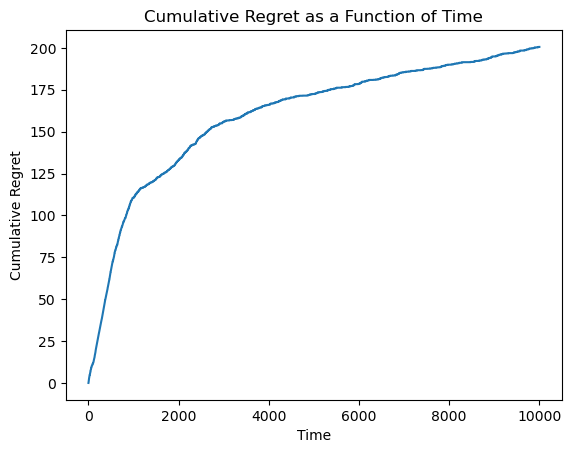

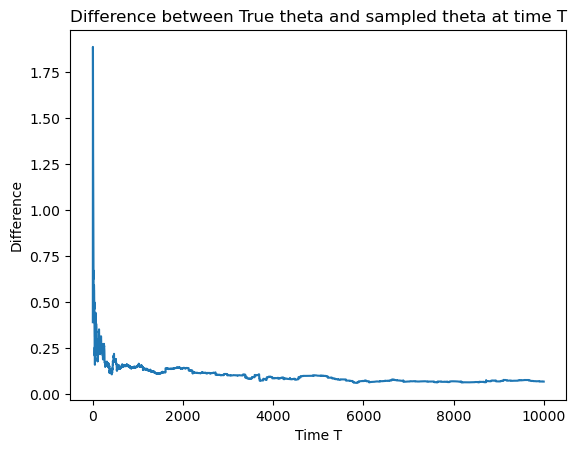

In [5]:
# Setup
d = 5
num_items = 10
num_rounds = 10000
sigma_noise = 1.0
# Generate random item_features with values between -1 and 1
item_features = np.random.uniform(low=-1, high=1, size=(num_items, d))
# Generate a random true_theta with values between -1 and 1
true_theta = np.random.uniform(low=-1, high=1, size=d)/d
#print("True theta: ", true_theta)

regrets, best_items, differences = thompson_sampling_linear_bandits(d, item_features, true_theta, num_rounds, sigma_noise)

# Plot the regret
plot_regret(regrets)

# Plot the differences
plt.plot(differences)
plt.xlabel('Time T')
plt.ylabel('Difference')
plt.title('Difference between True theta and estimate of theta at time T')
plt.show()


Over 100 runs

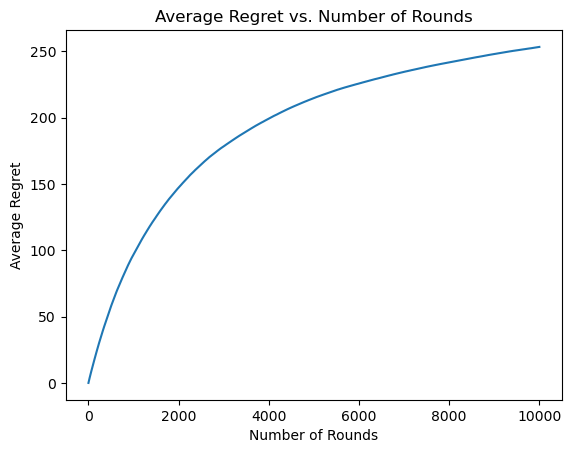

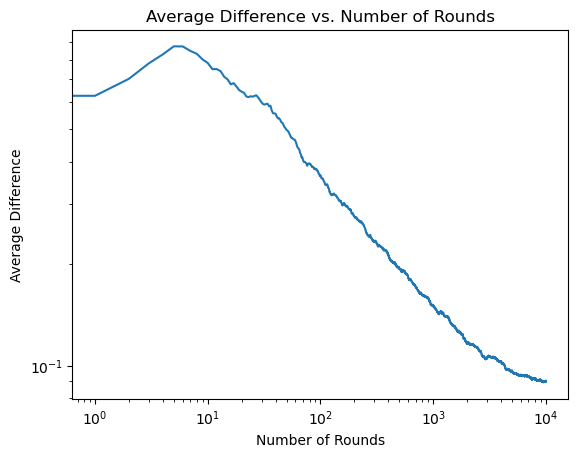

In [6]:
# Setup
# d = 3
# num_rounds = 1000
nbr_runs = 100
# sigma_noise = 1.0
# item_features = np.random.rand(num_items, d)
# true_theta = np.random.rand(d)

run_and_plot_thompson_sampling(d, item_features, true_theta, num_rounds, sigma_noise, nbr_runs)
